## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how = 'outer')
merge_df
#Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
Mouse_numbers = merge_df.groupby('Mouse ID')
Mouse_number_len= len(Mouse_numbers['Mouse ID'])
Mouse_number_len


249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_MiceID_Timepoint = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
Duplicate_MiceID_Timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Summary_statistics = clean_df.groupby('Drug Regimen')

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_mean = Summary_statistics['Tumor Volume (mm3)'].mean()
#print(Tumor_mean)
Tumor_median = Summary_statistics['Tumor Volume (mm3)'].median()
#print(Tumor_median)
Tumor_standar_deviation = Summary_statistics['Tumor Volume (mm3)'].std()
#print(Tumor_standar_deviation)
Tumor_variance = Summary_statistics['Tumor Volume (mm3)'].var()
#print(Tumor_variance)
Tumor_SEM = Summary_statistics['Tumor Volume (mm3)'].sem()
#print(Tumor_SEM)

#Dataframe to allocate the results
Summary_Drug_Regimen_Tumor_Volume = pd.DataFrame({'Mean':Tumor_mean,
                                                 'Median':Tumor_median,
                                                 'Standard Deviation':Tumor_standar_deviation,
                                                 'Variance': Tumor_variance,
                                                 'Tumor_SEM': Tumor_SEM})
Summary_Drug_Regimen_Tumor_Volume





,Mean,Median,Standard Deviation,Variance,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median','std','var', 'sem'])



,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Meaurements per drug regimen')

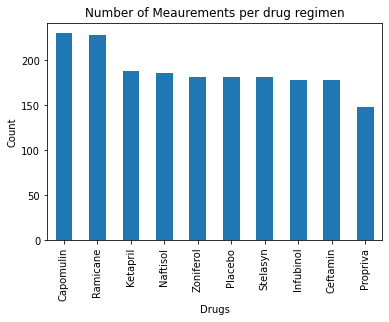

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Count_Drug_Regimen = clean_df["Drug Regimen"].value_counts()
Count_Drug_Regimen

Count_Drug_Regimen.plot(kind='bar')
plt.xlabel('Drugs')
plt.ylabel("Count")
plt.title('Number of Meaurements per drug regimen')


Text(0.5, 1.0, 'Number of Meaurements per drug regimen')

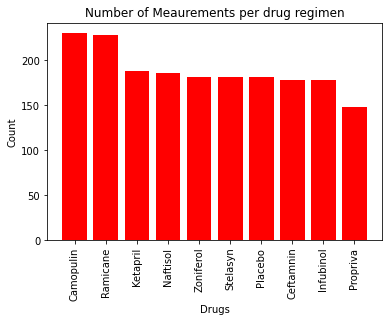

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis = clean_df["Drug Regimen"].value_counts()
x_axis= np.arange(len(y_axis))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations,["Camopulin","Ramicane","Ketapril", "Naftisol","Zoniferol", "Stelasyn","Placebo","Ceftamnin","Infubinol","Propriva"] ,rotation=90)

plt.bar( x_axis,y_axis, color='r')
plt.xlabel('Drugs')
plt.ylabel("Count")
plt.title('Number of Meaurements per drug regimen')

<AxesSubplot:ylabel='Sex'>

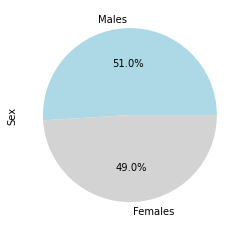

In [88]:
Count_gender=clean_df["Sex"]=="Male"
count_gender=Count_gender.value_counts()
labels=["Males","Females"]
count_gender.plot(kind="pie", labels=labels, autopct="%1.1f%%", colors=['lightblue','lightgray']) 

([<matplotlib.patches.Wedge at 0x7fb1d118bdd8>,
 [Text(-0.03608946990830779, 1.1994571897995099, 'Males'),
  Text(0.033082014082615095, -1.0995024239828841, 'Females')],
 [Text(-0.021052190779846207, 0.6996833607163808, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

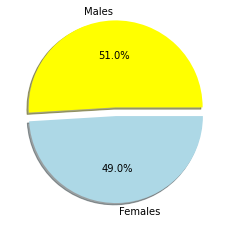

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Male_Gender_group = clean_df["Sex"]== "Male"
Count_Males= clean_df[Male_Gender_group]
Males=len(Count_Males)

Female_Gender_group = clean_df["Sex"]== "Female"
Count_Females= clean_df[Female_Gender_group]
Females=len(Count_Females)

pies=["Males","Females"]
pie_votes=[Males, Females]
colors=["yellow", "lightblue"]
explode=(0.1,0)
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow= True)



## Quartiles, Outliers and Boxplots

In [65]:
clean_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_point = clean_df.groupby('Mouse ID').Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_point = max_point.merge(clean_df, on=["Mouse ID", "Timepoint"])

In [67]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_data = max_point[max_point['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    iqr =tumor_data.quantile(.75)-tumor_data.quantile(.25)
    lower_bound= tumor_data.quantile(.25)-(1.5*iqr)
    upper_bound= tumor_data.quantile(.75)+(1.5*iqr)


# add subset 
    tumor_list.append(tumor_data)
    
    
# Determine outliers using upper and lower bounds
    print (f'{drug} potential outliers:{tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]}')

Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


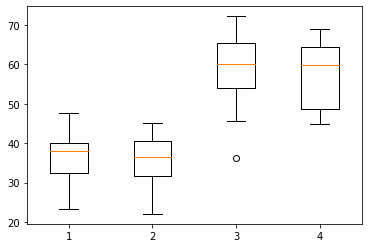

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, )
plt.show()

## Line and Scatter Plots

In [69]:
np.arange(0,50,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

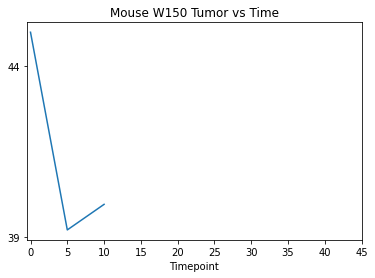

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'w150')]
mouse_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot(title='Mouse W150 Tumor vs Time')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(39,45,5))
plt.show()

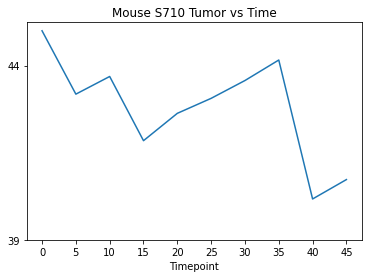

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 's710')]
mouse_df.set_index('Timepoint')['Tumor Volume (mm3)'].plot(title='Mouse S710 Tumor vs Time')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(39,45,5))
plt.show()

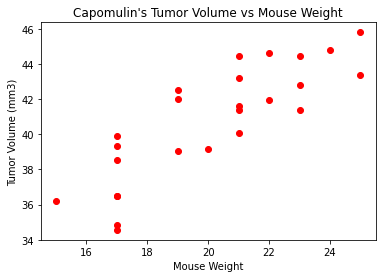

In [160]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin_group = clean_df[(clean_df['Drug Regimen']== 'Capomulin')]
avg_groupby = mouse_capomulin_group.groupby(['Mouse ID']).mean()

plt.scatter(avg_groupby["Weight (g)"],avg_groupby["Tumor Volume (mm3)"], color="red", marker='o') 
plt.title("Capomulin's Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
